## Corrigi os erros que foi menssionado mas nao consegui resolve o ultimo teste de hipoteses pois fiz uma colunas no df_aux_plan com io nome state mas mesmo assim ela deu NaN pesso que se me de uma ajuda se possivel 

# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você conclui esse projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de mergulhar na análise dos seus dados, explique em suas palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stats



## Carregue os dados

In [6]:
# Carregue os arquivos de dados em diferentes DataFrames
plans= pd.read_csv(r'C:\Users\cladi\OneDrive\Área de Trabalho\analize megalines\megaline_plans.csv')
users= pd.read_csv(r'C:\Users\cladi\OneDrive\Área de Trabalho\analize megalines\megaline_users.csv')
calls= pd.read_csv(r'C:\Users\cladi\OneDrive\Área de Trabalho\analize megalines\megaline_calls.csv')
messages= pd.read_csv(r'C:\Users\cladi\OneDrive\Área de Trabalho\analize megalines\megaline_messages.csv')
internet= pd.read_csv(r'C:\Users\cladi\OneDrive\Área de Trabalho\analize megalines\megaline_internet.csv')


## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [8]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
df_plans = plans
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [9]:
# Imprima uma amostra de dados dos planos
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

observei que os valores monetarios da tabela a coluna 3,4 estava com numeros inteiros ou seja com dtypes incorretos para sua categoria que deveria ser float

## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [10]:
# convertendo algum dtypes incorretos para suas colunas 
df_plans['usd_monthly_pay'] = df_plans['usd_monthly_pay'].astype(float)  # Pode ser em dólares e centavos
df_plans['usd_per_gb'] = df_plans['usd_per_gb'].astype(float)
df_plans['plan_name'] = df_plans['plan_name'].astype('category')
df_plans.to_csv('df_plans_A.csv', index= False)
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


## Usuários

In [11]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
df_users = users
df_users.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
# Imprima uma amostra de dados dos usuários
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]
Acredito com base no meu conhecimento de telemaketing que a coluna churn_ date  que apresenta numeros nulos são usuarios que não cancelaram o plano por isso   tanbem arrumar os tipos de datas
tanbem decidi alterar o nome da coluna plan para plan_name para se igualar as outras para ficar melhor na hora de mesclar as colunas

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [13]:
# vou altera o dtype das coluna 5,6,7 para os corretos 
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


In [14]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## Chamadas

In [15]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas
df_calls = calls
df_calls.info()
df_calls.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [16]:
# Imprima uma amostra de dados das chamadas
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Bom atraves de uma analize acredito que o unico erro na tabela eo dtype da coluna call_date que esta como object e deveria ser datatime.e tanbem mudei a ordem da data para dia/mes/ano

verefiquei se ha numeros nulos mas não  foi encontrado 

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [17]:
# fazendo a correção do datatime 
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


## messages

In [18]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
df_messages = messages
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Imprima uma amostra dos dados das mensagens
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

como no data frame calls eu fis as mesmas mudanças pois encontrei os mesmos erros 

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [20]:
#fazendo a correção do datatime correto da coluna message_date
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


## Internet

In [21]:
# Imprima as informações gerais/resumidas sobre o DataFrame da internet
df_internet = internet
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [22]:
#  Imprima uma amostra de dados para o tráfego da internet
df_internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Bom neste data frame eu encontrei os erros cimilares aos outros DFs 

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [23]:
# aqui corrigirei o dtypes do data frame .
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


## Estude as condições dos planos

[É fundamental entender como os planos funcionam e como são as cobranças dos usuários com base na assinatura. Sugerimos imprimir as informações do plano para visualizar novamente as condições.]

In [ ]:
# Imprima as condições do plano e certifique-se de que elas fazem sentido para você
df_plans.head()

## Agregue os dados por usuário

[Agora, como os dados estão limpos, agregue os dados por usuário por período para ter apenas um registro por usuário por período. Isso vai facilitar muito a análise posterior.]

In [ ]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
df_calls['month'] = df_calls['call_date'].dt.month
number_calls = df_calls.groupby(['user_id', 'month'])['id'].count().reset_index()
number_calls.rename(columns={'id':'calls number'},inplace= True)
number_calls.head()


In [ ]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
df_calls['month'] = df_calls['call_date'].dt.month
df_calls_users = df_calls[['user_id',  'month', 'duration']]
# Agrupei por 'user_id', 'first_name' e mês da chamada, e calcule a quantidade total de minutos em cada grupo
df_minutes_per_user = df_calls_users.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')

df_minutes_per_user.head()



In [ ]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
df_messages['month'] = df_messages['message_date'].dt.month
number_messages = df_messages.groupby(['user_id','month'])['id'].count().reset_index()
number_messages.rename(columns={'id':'messages number'},inplace= True)
number_messages.head()

In [ ]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
df_internet['month'] = df_internet['session_date'].dt.month
mb_used_per_users = df_internet[['user_id', 'month', 'mb_used']]
# Agrupei por 'user_id', 'first_name' e mês da chamada, e calcule a quantidade total de minutos em cada grupo
mb_used_per_users= mb_used_per_users.groupby(['user_id','month'])['mb_used'].sum().reset_index(name='total_mb')

mb_used_per_users.head()

[Coloque os dados agregados em um DataFrame para que um registro nele represente o que um usuário unívoco consumiu em um determinado mês.]

In [ ]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
df_aggregated = number_calls.merge(df_minutes_per_user, on=['user_id', 'month'])
df_aggregated = df_aggregated.merge(number_messages, on=['user_id', 'month'])
df_aggregated = df_aggregated.merge(mb_used_per_users, on=['user_id', 'month'])
df_aggregated.head()


In [ ]:
# Adicione as informações sobre o planos
df_aux_plan= pd.merge(df_users [['user_id','plan']],df_plans, left_on= 'plan', right_on= 'plan_name')
df_aux_plan = pd.merge(df_aggregated, df_aux_plan, on= 'user_id', how='left')
df_aux_plan = df_aux_plan.drop('plan_name', axis=1)
# Mesclando os dados com base no user_id
df_combined = pd.merge(df_users, df_aux_plan, on='user_id', how='inner')
# Adicionando as colunas de estado e cidade ao DataFrame combinado
df_combined['state'] = df_combined['city'].str.extract(r', (.+?) MSA')
df_combined['city'] = df_combined['city'].str.extract(r'(.+?),')
df_combined = df_combined.drop(['reg_date', 'last_name', 'churn_date', 'plan_y', 'city'], axis=1)
df_combined = df_combined.rename(columns={'plan_x': 'plan'})
df_aux_plan = df_combined
# Exibindo o DataFrame combinado atualizado


df_aux_plan.head()




[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano de chamadas; adicione o preço mensal dependendo do plano. Importante: isso pode não ser tão trivial quanto apenas algumas linhas, dadas as condições do plano. Portanto, não há problema em gastar algum tempo nisso.]

In [37]:
# Calcule a receita mensal para cada usuário
def information_plan(month, calls, total_minutes, messages, total_mb, plan):
    # Definir valores padrão para as taxas e limites de inclusão
    messages_included_surf = 50
    mb_per_month_included_surf = 15360
    minutes_included_surf = 500
    usd_monthly_pay_surf = 20.0
    usd_per_gb_surf = 10.0
    usd_per_message_surf = 0.03
    usd_per_minute_surf = 0.03

    messages_included_ultimate = 1000
    mb_per_month_included_ultimate = 30720
    minutes_included_ultimate = 3000
    usd_monthly_pay_ultimate = 70.0
    usd_per_gb_ultimate = 7.0
    usd_per_message_ultimate = 0.01
    usd_per_minute_ultimate = 0.01

    # Verificar o plano e atribuir os valores corretos
    if plan == 'surf':
        messages_included = messages_included_surf
        mb_per_month_included = mb_per_month_included_surf
        minutes_included = minutes_included_surf
        usd_monthly_pay = usd_monthly_pay_surf
        usd_per_gb = usd_per_gb_surf
        usd_per_message = usd_per_message_surf
        usd_per_minute = usd_per_minute_surf
    elif plan == 'ultimate':
        messages_included = messages_included_ultimate
        mb_per_month_included = mb_per_month_included_ultimate
        minutes_included = minutes_included_ultimate
        usd_monthly_pay = usd_monthly_pay_ultimate
        usd_per_gb = usd_per_gb_ultimate
        usd_per_message = usd_per_message_ultimate
        usd_per_minute = usd_per_minute_ultimate
    else:
        # Caso o plano não seja reconhecido, lançar uma exceção ou tomar ação adequada
        raise ValueError("Plano desconhecido: {}".format(plan))

    # Calcular a receita com base nos valores do plano
    revenue = usd_monthly_pay

    # Verificar se houve excedentes e calcular as taxas adicionais
    if calls > minutes_included:
        revenue += (calls - minutes_included) * usd_per_minute

    if messages > messages_included:
        revenue += (messages - messages_included) * usd_per_message

    if total_mb > mb_per_month_included:
        gb_excess = (total_mb - mb_per_month_included) / 1024
        revenue += gb_excess * usd_per_gb

    return revenue


df_aux_plan['revenue'] = df_aux_plan.apply(lambda row: information_plan(row['month'], row['calls number'], row['total_minutes'], row['messages number'], row['total_mb'], row['plan']), axis=1)
df_aux_plan['revenue'] = df_aux_plan['revenue'].round(2)
df_aux_plan.head()



,user_id,first_name,age,plan,month,calls number,total_minutes,messages number,total_mb,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,state,revenue
0,1000,Anamaria,45,ultimate,12,16,116.83,11,1901.47,1000,30720,3000,70.0,7.0,0.01,0.01,GA,70.00
1,1001,Mickey,28,surf,8,27,171.14,30,6919.15,50,15360,500,20.0,10.0,0.03,0.03,WA,20.00
2,1001,Mickey,28,surf,9,49,297.69,44,13314.82,50,15360,500,20.0,10.0,0.03,0.03,WA,20.00
3,1001,Mickey,28,surf,10,65,374.11,53,22330.49,50,15360,500,20.0,10.0,0.03,0.03,WA,88.16
4,1001,Mickey,28,surf,11,64,404.59,36,18504.30,50,15360,500,20.0,10.0,0.03,0.03,WA,50.71


## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados e unidos, que geralmente revelam uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para chamadas, mas elas não são fornecidas para mensagens e internet, embora o princípio do estudo estatístico seja o mesmo para todas.]

### Chamadas

<Axes: xlabel='month'>

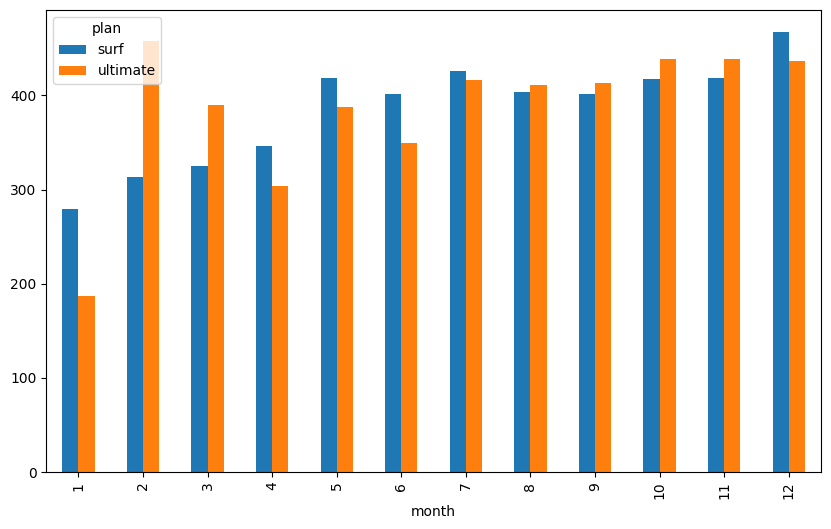

In [38]:
# Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.
df_aux_plan.groupby(['month', 'plan'])['total_minutes'].mean().unstack().plot(kind='bar', figsize=(10, 6))



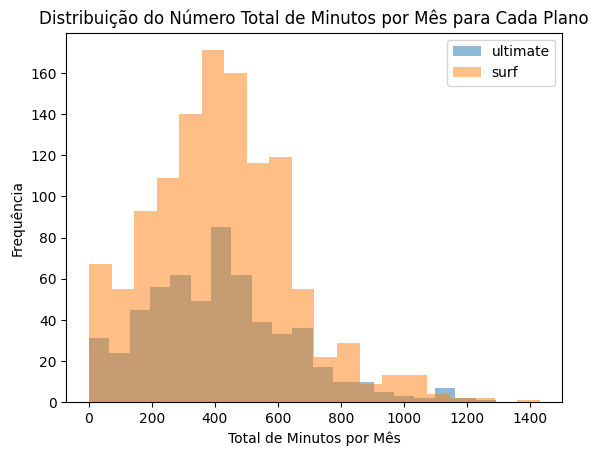

In [39]:
# Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.
for plan_type in df_aux_plan['plan'].unique():
    subset_data = df_aux_plan[df_aux_plan['plan'] == plan_type]
    plt.hist(subset_data['total_minutes'], bins=20, alpha=0.5, label=plan_type)

# Adiciona rótulos e legenda ao gráfico
plt.xlabel('Total de Minutos por Mês')
plt.ylabel('Frequência')
plt.title('Distribuição do Número Total de Minutos por Mês para Cada Plano')
plt.legend()

# Exibe o histograma
plt.show()

[Calcule a média e a variável da duração da chamada para raciocinar se os usuários de diferentes planos possuem comportamentos diferentes em suas chamadas.]

In [40]:
# Calcule a média e a variação da duração mensal das chamadas
monthly_call_stats = df_aux_plan.groupby('month')['total_minutes'].agg(['mean', 'var', 'std'])

# Renomeia as colunas para maior clareza
monthly_call_stats = monthly_call_stats.rename(columns={'mean': 'mean_duration', 'var': 'variance_duration', 'std': 'std_duration'})

# Exibe as estatísticas
print(monthly_call_stats)

       mean_duration  variance_duration  std_duration
month                                                
1         210.302500       17006.062625    130.407295
2         385.778000       72485.752107    269.231781
3         344.665652       41492.633408    203.697406
4         332.745882       49522.222293    222.535890
5         409.783108       53153.109597    230.549582
6         383.548037       40726.601740    201.808329
7         422.811397       62417.797202    249.835540
8         406.549545       49441.500196    222.354447
9         405.630550       46486.578243    215.607463
10        424.522230       48027.279205    219.151270
11        425.175156       48977.816677    221.309324
12        457.121590       56989.973598    238.725729


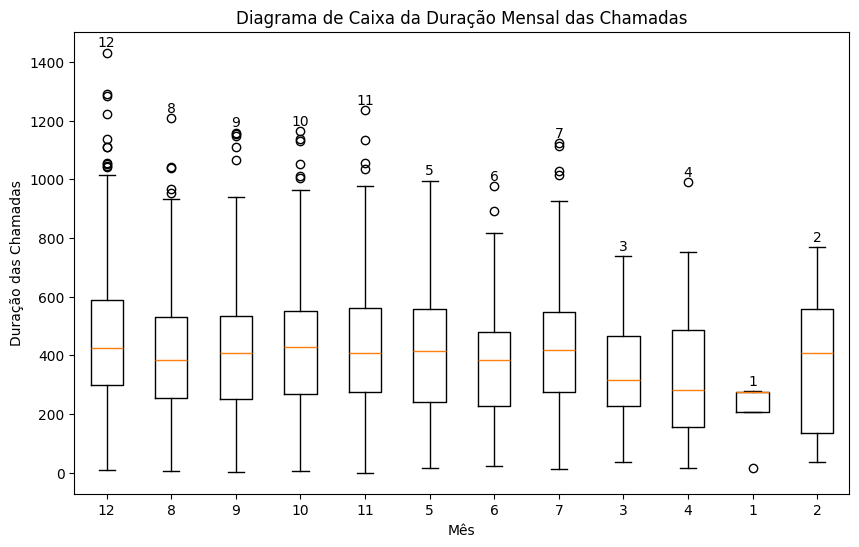

In [41]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
# Lista de meses únicos
unique_months = df_aux_plan['month'].unique()

# Lista de dados para o boxplot
data = [df_aux_plan[df_aux_plan['month'] == month]['total_minutes'] for month in unique_months]

# Diagrama de Caixa
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=unique_months)

# Adicionando anotações como legenda
for i, month in enumerate(unique_months):
    plt.text(i + 1, max(data[i]) + 10, str(month), ha='center', va='bottom')

# Rótulos e título
plt.xlabel('Mês')
plt.ylabel('Duração das Chamadas')
plt.title('Diagrama de Caixa da Duração Mensal das Chamadas')

# Exibindo o gráfico
plt.show()

[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

Ao olhar o primeiro grafico percebo que a descrepancia nos planos o plano surf   tem melhor aderencia na população pelo seu valor mais assecivel  nos valores mençais. noto tanbem nos graficos que o primeiro mes o plano suf liderava em numeros de chamadas tinha uma grande diferença entro o surf eo ultimate mas no mes 2,3 o plano ultimate teve uma acenção nos numeros de ligação que logo nos meses seguintes foi ocupada pelo plano surf novamente . as duraçoes de chamadas do planos surf  são maiores tbm com base nesses dado tiro a comclusão que o plano surf para chamadas eo mais usado


### Mensagens

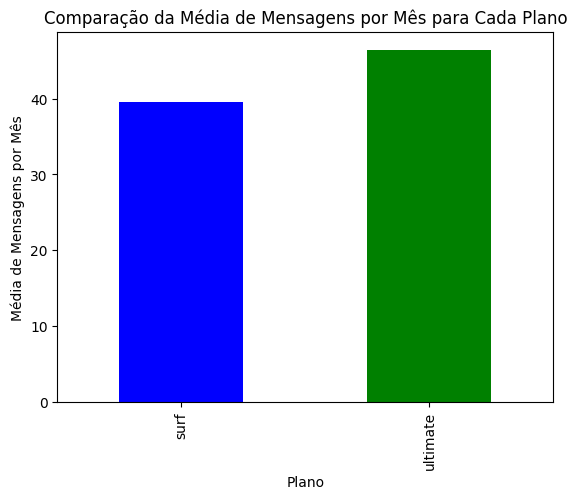

In [42]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês

media_mensagens_por_plano = df_aux_plan.groupby('plan')['messages number'].mean()

# Plotando o gráfico de barras para comparar
media_mensagens_por_plano.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Plano')
plt.ylabel('Média de Mensagens por Mês')
plt.title('Comparação da Média de Mensagens por Mês para Cada Plano')
plt.show()

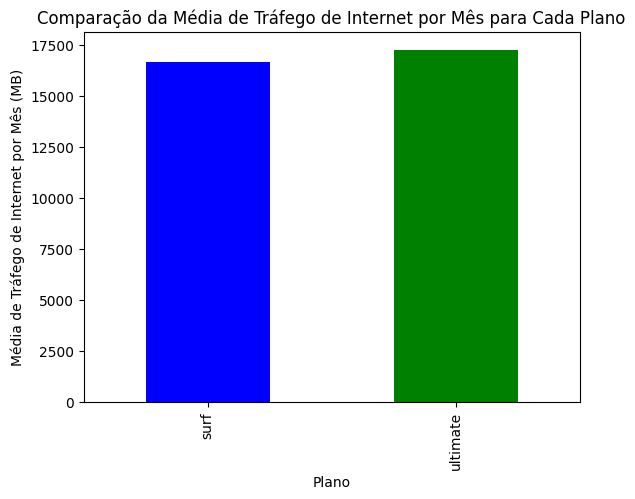

In [43]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
# Calculando a média de tráfego de internet por mês para cada plano
media_trafego_por_plano = df_aux_plan.groupby('plan')['total_mb'].mean()

# Plotando o gráfico de barras para comparar
media_trafego_por_plano.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Plano')
plt.ylabel('Média de Tráfego de Internet por Mês (MB)')
plt.title('Comparação da Média de Tráfego de Internet por Mês para Cada Plano')
plt.show()


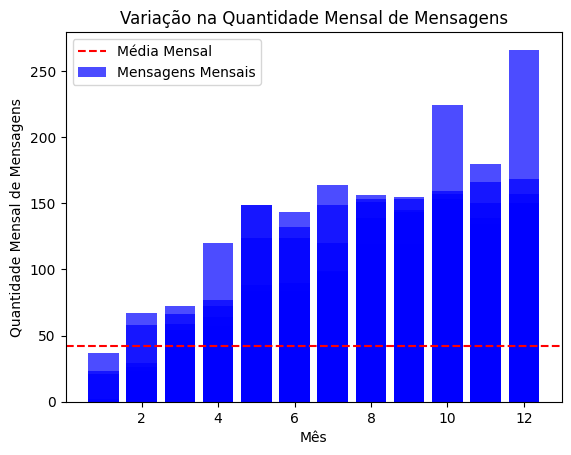

Variação da quantidade mensal de mensagens: 1067.55


In [44]:
# Calculando a variação da quantidade mensal de mensagens
variancia_mensagens = df_aux_plan['messages number'].var()

# Construindo o gráfico
plt.bar(df_aux_plan['month'], df_aux_plan['messages number'], color='blue', alpha=0.7, label='Mensagens Mensais')
plt.axhline(y=df_aux_plan['messages number'].mean(), color='red', linestyle='--', label='Média Mensal')
plt.xlabel('Mês')
plt.ylabel('Quantidade Mensal de Mensagens')
plt.title('Variação na Quantidade Mensal de Mensagens')
plt.legend()
plt.show()

# Exibindo a variação no console
print(f'Variação da quantidade mensal de mensagens: {variancia_mensagens:.2f}')

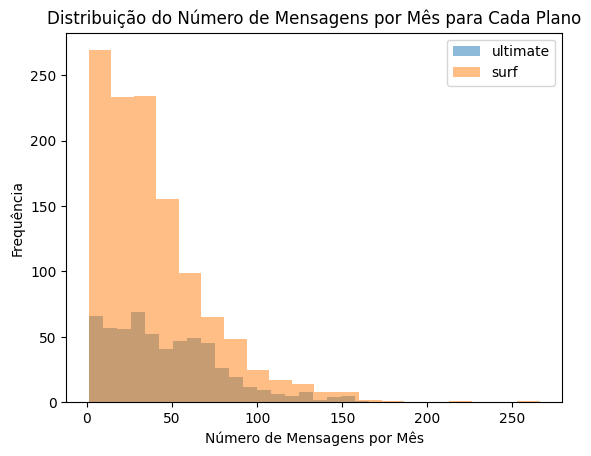

In [45]:
# Compare o número de menssages de que os usuários de cada plano necessitam a cada mês. Construa um histograma.
# Criando o histograma comparando o número de mensagens por plano
for plan_type in df_aux_plan['plan'].unique():
    subset_data = df_aux_plan[df_aux_plan['plan'] == plan_type]
    plt.hist(subset_data['messages number'], bins=20, alpha=0.5, label=plan_type)

# Adiciona rótulos e legenda ao gráfico
plt.xlabel('Número de Mensagens por Mês')
plt.ylabel('Frequência')
plt.title('Distribuição do Número de Mensagens por Mês para Cada Plano')
plt.legend()

# Exibe o histograma
plt.show()

[Formule conclusões sobre como os usuários se comportam em termos de mensagens. O comportamento é diferente dependendo do plano?]
 bom ao analizar o graficos de messagens vi que a media de menssagens para o plano ultimate e um pouco maior comparado ao surf quase igual a ou numero de trafego de internet levando a compreender que o usuario usa os dados juntos com a s menssagens .

### Internet

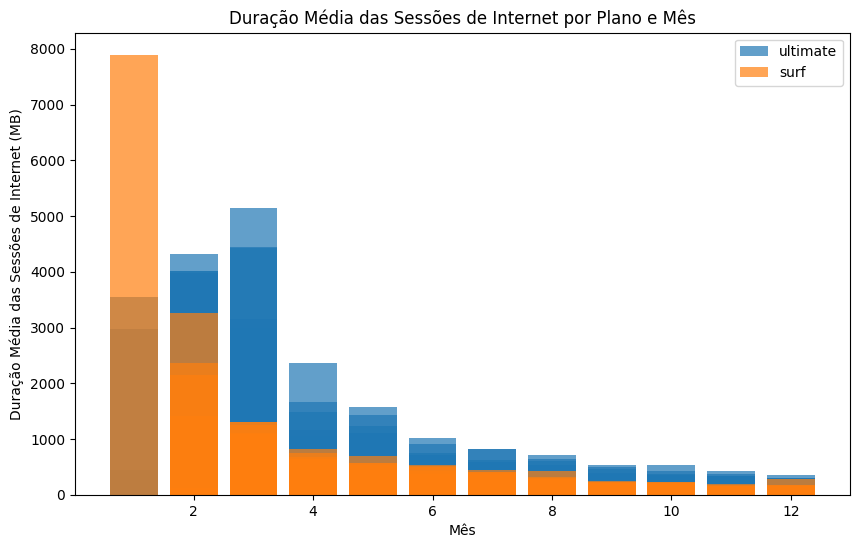

In [46]:
 # Calcular a duração média das sessões de internet para cada plano em cada mês
df_aux_plan['avg_mb_per_session'] = df_aux_plan['total_mb'] / df_aux_plan.groupby(['plan', 'month'])['user_id'].transform('count')

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
for plan in df_aux_plan['plan'].unique():
    plan_data = df_aux_plan[df_aux_plan['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['avg_mb_per_session'], label=plan, alpha=0.7)

plt.xlabel('Mês')
plt.ylabel('Duração Média das Sessões de Internet (MB)')
plt.title('Duração Média das Sessões de Internet por Plano e Mês')
plt.legend()
plt.show()

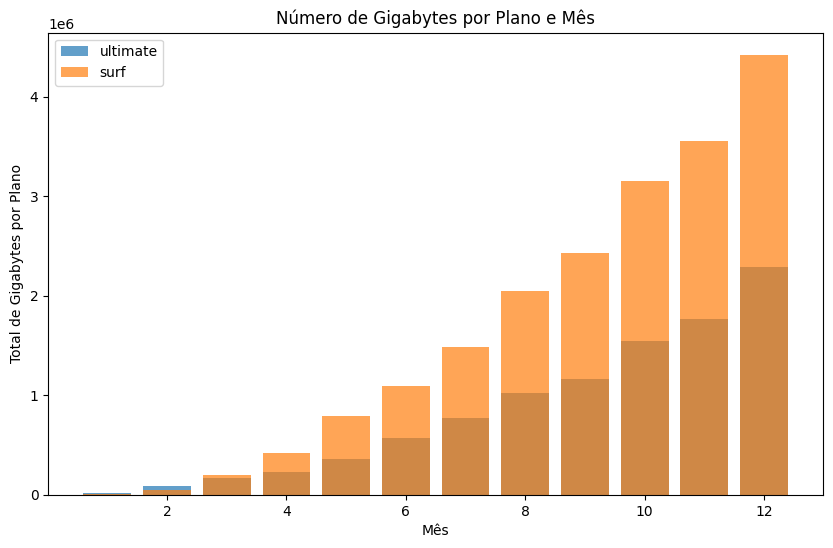

In [47]:
# Agrupar por plano e mês e calcular o total de gigabytes
gb_per_plan_month = df_aux_plan.groupby(['plan', 'month'])['total_mb'].sum().reset_index()

# Construir o histograma
plt.figure(figsize=(10, 6))
for plan in df_aux_plan['plan'].unique():
    plan_data = gb_per_plan_month[gb_per_plan_month['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['total_mb'], label=plan, alpha=0.7)

plt.xlabel('Mês')
plt.ylabel('Total de Gigabytes por Plano')
plt.title('Número de Gigabytes por Plano e Mês')
plt.legend()
plt.show()

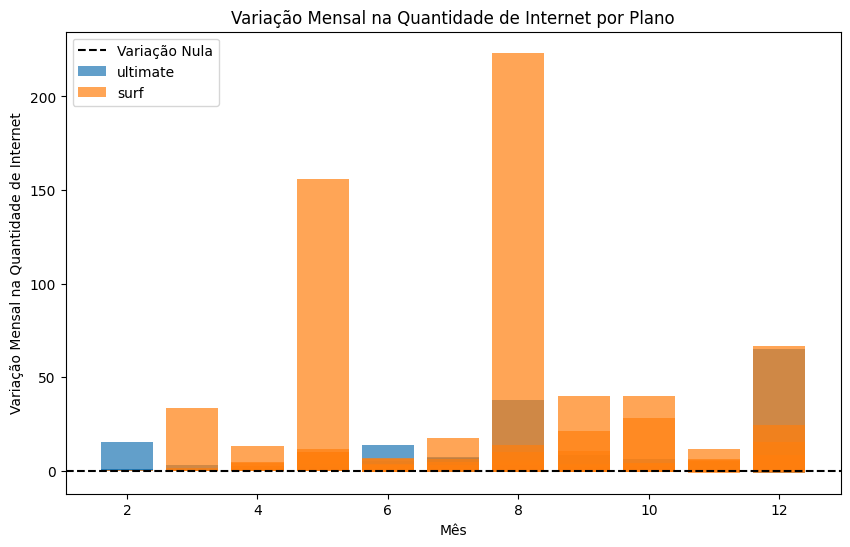

In [48]:
# Calcular a variação mensal na quantidade de internet
df_aux_plan['internet_variation'] = df_aux_plan.groupby('user_id')['total_mb'].pct_change()

# Criar um gráfico de barras para visualizar a variação mensal
plt.figure(figsize=(10, 6))
for plan in df_aux_plan['plan'].unique():
    plan_data = df_aux_plan[df_aux_plan['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['internet_variation'], label=plan, alpha=0.7)

plt.axhline(y=0, color='black', linestyle='--', label='Variação Nula')
plt.xlabel('Mês')
plt.ylabel('Variação Mensal na Quantidade de Internet')
plt.title('Variação Mensal na Quantidade de Internet por Plano')
plt.legend()
plt.show()

[Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

com a analize dos grafico podemos tirar as seguinte comclusões que o plano ultimate ganha em aspectos de dados de navegação na internet pois os numeros dãoa entender que pela quantidade de dados srem maiores muitos preferem este plano para navegação

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

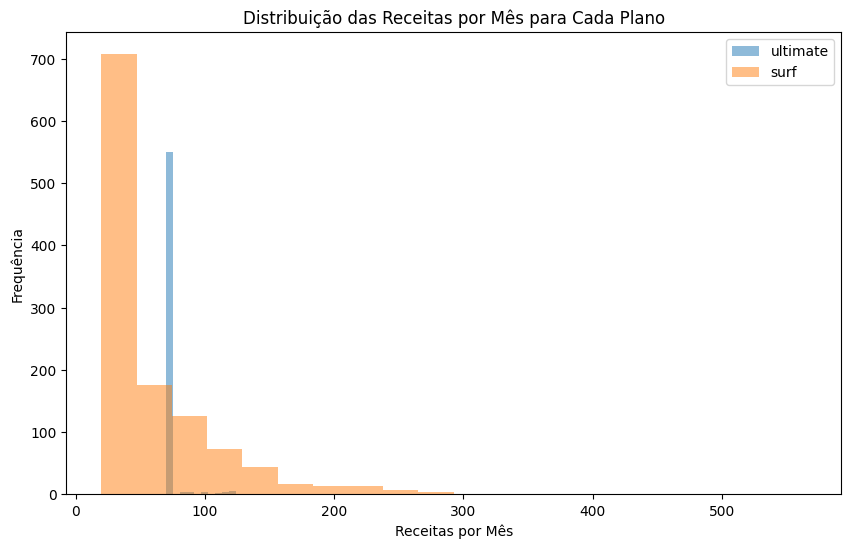

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1180.0,55.252203,50.920482,20.0,20.0,35.265,75.0125,564.97
ultimate,579.0,72.062936,10.482568,70.0,70.0,70.000,70.0000,178.52


In [49]:
# Descrição estatística das receitas por plano


# Descrição estatística das receitas por plano
descricao_receitas = df_aux_plan.groupby('plan')['revenue'].describe()

# Criando um histograma
plt.figure(figsize=(10, 6))
for plan_type in df_aux_plan['plan'].unique():
    subset_data = df_aux_plan[df_aux_plan['plan'] == plan_type]
    plt.hist(subset_data['revenue'], bins=20, alpha=0.5, label=plan_type)

# Adicionando rótulos e legenda ao gráfico
plt.xlabel('Receitas por Mês')
plt.ylabel('Frequência')
plt.title('Distribuição das Receitas por Mês para Cada Plano')
plt.legend()
plt.show()

# Exibindo a descrição estatística
descricao_receitas.head()


[Formule conclusões sobre como a receita difere entre os planos.]

A média de receita é mais alta para o plano 'surf', mas a variabilidade é também maior, indicando uma gama mais ampla de valores.
O plano 'ultimate' tem uma média menor, mas uma variabilidade menor nas receitas.
A distribuição das receitas para o plano 'surf' é mais ampla e inclui valores extremos, enquanto a distribuição para o plano 'ultimate' é mais compacta.
Essas conclusões indicam que, em média, o plano 'surf' gera mais receita, mas também tem uma variabilidade maior, incluindo casos de receitas extremamente elevadas. O plano 'ultimate' tem uma receita média menor, mas é mais consistente em termos de variabilidade. Essas diferenças podem influenciar estratégias de marketing, ajustes de preços ou tomada de decisões relacionadas à oferta de serviços.

## Teste hipóteses estatísticas

[Teste a hipótese de que as receitas médias dos usuários dos planos de chamadas Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

#Hipótese Nula (H0):

A média das receitas do plano Ultimate é igual à média das receitas do plano Surf.

#Hipótese Alternativa (H1):

A média das receitas do plano Ultimate é diferente da média das receitas do plano Surf.
Agora, vamos incorporar essas hipóteses no teste t de duas amostras:

In [50]:
# Teste as hipóteses

# Separando os dados para os planos Ultimate e Surf
receitas_ultimate = df_aux_plan[df_aux_plan['plan'] == 'ultimate']['revenue']
receitas_surf = df_aux_plan[df_aux_plan['plan'] == 'surf']['revenue']

# Realizando o teste t de duas amostras
statistic, p_value = stats.ttest_ind(receitas_ultimate, receitas_surf, equal_var=False)

# Exibindo os resultados
print(f'Estatística do teste t: {statistic}')
print(f'Valor p: {p_value}')

# Comparando com o valor alfa
alpha = 0.05
if p_value < alpha:
    print('Rejeita-se a hipótese nula: As médias das receitas são diferentes.')
else:
    print('Não há evidências para rejeitar a hipótese nula: As médias das receitas são iguais.')


Estatística do teste t: 10.880444009757367
Valor p: 1.6710463414192763e-26
Rejeita-se a hipótese nula: As médias das receitas são diferentes.


[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

Hipótese Nula (H0): A receita média dos usuários da área de NY-NJ é igual à receita média dos usuários das demais regiões.

Hipótese Alternativa (H1): A receita média dos usuários da área de NY-NJ difere da receita média dos usuários das demais regiões.

In [ ]:
# Teste as hipóteses
df=df_aux_plan
receitas_ny_nj = df[df['state'] == 'NY-NJ']['revenue']
receitas_other_regions = df[df['state'] != 'NY-NJ']['revenue']

# Realizando o teste t de duas amostras
statistic, p_value = stats.ttest_ind(receitas_ny_nj, receitas_other_regions, equal_var=False)

# Exibindo os resultados
print(f'Estatística do teste t: {statistic}')
print(f'Valor p: {p_value}')

# Comparando com o valor alfa
alpha = 0.05
if p_value < alpha:
    print('Rejeita-se a hipótese nula: As médias das receitas são diferentes para a área de NY-NJ e outras regiões.')
else:
    print('Não há evidências para rejeitar a hipótese nula: As médias das receitas são iguais para a área de NY-NJ e outras regiões.')

## Conclusão geral

[Liste suas conclusões importantes nessa seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.]

Nesta analize fiz  um trabalho onde minha noção sobre rede mea judou a entender um pouco dos aspectos de cada plano tentei penssar como o cliente, mas tanbem percebi que o plano surf tem uma grande variação de receita pois pelo valor do plano ser menor se torna mais atrativo mas por poucas quantidades de menssagens e gb e minutos de chamadas inclusso no plano faz com que as pessoas consuman dados ou minutos extras fazendo com que a receita seja maior mas tenha uma grande variação . Ja o plano ultimate tem uma receita mais estaveis pois o valor de dele e mais que o do outro plano mas ja seus beneficios são melhores e muitos nao tendem a usar muitos deles pois o que o plano oferecem ja o comportam muito bem fazendo que os usuarios nao usem dados, chamadas, ou mbs extras , fazend que nao  crie uma grande variação nos valores das receitas menssais, tanbem tirei minha conclusoes que o plano surf caba sendo mais lucrativo,